In [37]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter
# 随机过采样
from imblearn.over_sampling import RandomOverSampler
# SMOTE算法
from imblearn.over_sampling import SMOTE
# 欠采样方法
from imblearn.under_sampling import RandomUnderSampler

# 准备类别不平衡数据    make_classification

In [13]:
# n_samples: 样本数
# n_features: 特征数   = n_informative + n_redundant + n_repeated
# n_informative: 多信息特征的个数
# n_redundant: 冗余信息,informative特征的随机线性组合
# n_repeated: 重复信息,随机提取n_informative和n_redundant特征
# n_class 分类类别
# n_clusters_per_class 某一个类别是由几个cluster组成的
# weights 列表类型,权重比
# random_state 随机
x, y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, 
                          n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=[0.01, 0.05, 0.94], random_state=0)
x, x.shape

(array([[ 8.62420206e-01, -9.63476905e-01],
        [-1.38080465e-03, -2.66979396e+00],
        [ 1.40804486e+00, -5.32895046e-01],
        ...,
        [ 1.09447133e+00, -6.99569620e-01],
        [ 1.60312887e+00, -8.26180435e-01],
        [ 1.99589648e+00,  5.42836944e-01]]),
 (5000, 2))

In [12]:
y, y.shape

(array([2, 2, 2, ..., 2, 2, 2]), (5000,))

In [16]:
# y有两种类别,不同类别的数量
Counter(y)

Counter({2: 4674, 1: 262, 0: 64})

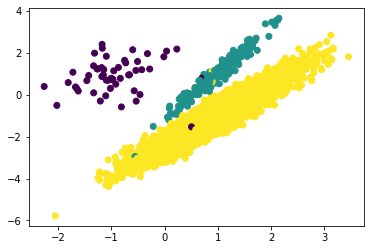

In [19]:
# 数据可视化
# x[:, 0] 所有行,第0列
# c=y 基于y分成不同类别
plt.scatter(x[:, 0], x[:, 1], c=y)

# 处理不平衡数据

## 过采样
减少数量较多的哪一类样本的数量,使得正负样本比例均衡

### 随机过采样 RandomOverSampler

In [26]:
ros = RandomOverSampler(random_state=0)
x_resmapled, y_resampled = ros.fit_resample(x, y)
x_resmapled, y_resampled

(array([[ 8.62420206e-01, -9.63476905e-01],
        [-1.38080465e-03, -2.66979396e+00],
        [ 1.40804486e+00, -5.32895046e-01],
        ...,
        [ 9.56523278e-01,  6.92621686e-01],
        [ 1.55627567e+00,  2.59785713e+00],
        [ 1.00417111e+00,  1.28396615e+00]]),
 array([2, 2, 2, ..., 1, 1, 1]))

In [27]:
Counter(y_resampled)  # 数据量相等了

Counter({2: 4674, 1: 4674, 0: 4674})

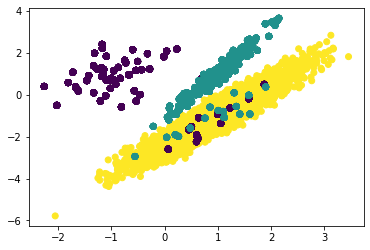

In [30]:
plt.scatter(x_resmapled[:, 0], x_resmapled[:, 1], c=y_resampled)

### SMOTE算法

In [34]:
smote = SMOTE()
x_resmapled, y_resampled = smote.fit_resample(x, y)
x_resmapled, y_resampled

(array([[ 8.62420206e-01, -9.63476905e-01],
        [-1.38080465e-03, -2.66979396e+00],
        [ 1.40804486e+00, -5.32895046e-01],
        ...,
        [ 9.41178456e-01,  9.96479378e-01],
        [ 5.69682561e-01,  3.33421505e-01],
        [ 1.06169698e+00,  1.19622596e+00]]),
 array([2, 2, 2, ..., 1, 1, 1]))

In [35]:
Counter(y_resampled)  # 数据量相等了

Counter({2: 4674, 1: 4674, 0: 4674})

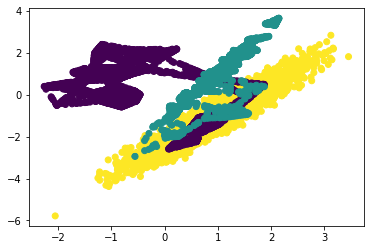

In [36]:
plt.scatter(x_resmapled[:, 0], x_resmapled[:, 1], c=y_resampled)

## 欠采样
增加数量较少那一类样本的数量,使得正负样本比例均衡
### 随机欠采样 RandomUnderSampler

In [39]:
under = RandomUnderSampler()
x_resmapled, y_resampled = under.fit_resample(x, y)
x_resmapled, y_resampled

(array([[-0.81308876, -0.58458888],
        [-1.1757406 ,  2.39951096],
        [-0.95636194,  1.13887815],
        [-0.75243112,  1.63901168],
        [-1.14384009,  1.20071991],
        [ 0.91571916,  0.79866976],
        [-1.42779869,  0.91574544],
        [-0.46341734,  0.00651294],
        [-1.62358834,  0.17612207],
        [-0.57205867,  0.18580141],
        [-1.31747812,  1.98223995],
        [-1.6490872 ,  0.28335912],
        [-1.17148255,  2.21767182],
        [-0.53509434, -0.30689184],
        [-0.91887206,  0.50280596],
        [-0.50960989,  1.58553985],
        [-0.66091777,  0.95013445],
        [-2.26441606,  0.39276379],
        [ 0.22852701,  2.17686175],
        [-0.83363957,  0.77928537],
        [-0.32295167,  1.95895841],
        [ 0.99407886, -0.93048558],
        [-1.25138527,  1.23218468],
        [-1.18445038,  1.29350657],
        [ 0.03614233,  2.0793427 ],
        [-0.9732065 ,  0.73207005],
        [-1.09622173,  1.83510097],
        [-1.33543347,  1.377

In [40]:
Counter(y_resampled)    # 数据都减少了

Counter({0: 64, 1: 64, 2: 64})

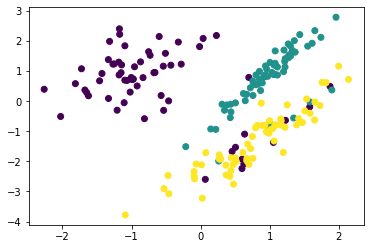

In [41]:
plt.scatter(x_resmapled[:, 0], x_resmapled[:, 1], c=y_resampled)